# CartPole-v0 with DQNAgent

by Mohammad Ayyaz Azeem

## Step 01: Installing Dependencies

In [1]:
!pip install tensorflow==2.3.0
!pip install gym
!pip install keras
!pip install keras-rl2
!pip install pyglet

## Step 02: Testing Random Environment with OpenAI Gym

In [2]:
import gym
import random

Setting up the environment

In [3]:
env = gym.make('CartPole-v0') #make method to build our cartpole environment
states = env.observation_space.shape[0] # to look at all different states
actions = env.action_space.n # the number of actions

type of states and action 

In [4]:
type(states),type(actions)

(int, int)

number of states and action

In [5]:
states, actions

(4, 2)

actions = 2 meaning Left or Right movement of cartpole

...

visualize our cartpole by taking random steps and create reward (max reward is 200 points)

In [6]:
episodes = 15
for i in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    
    while not done:
        env.render() # allows us to see our cart in action
        action = random.choice([0,1]) #  random choice left or right
        n_state, reward, done, info = env.step(action) # taking a random step,
        score+=reward # based on our step we will get reward and we accumulate a score, at the very end done = True 
    print('Episode:{} Score: {}'.format(i,score))

d:\installed_program\anaconda3\lib\site-packages\pyglet\window\__init__.py:667: UserWarning: 
Your graphics drivers do not support OpenGL 2.0.
You may experience rendering issues or crashes.
Microsoft Corporation
GDI Generic
1.1.0
  warnings.warn(message)


Episode:1 Score: 51.0
Episode:2 Score: 30.0
Episode:3 Score: 15.0
Episode:4 Score: 14.0
Episode:5 Score: 14.0
Episode:6 Score: 9.0
Episode:7 Score: 25.0
Episode:8 Score: 12.0
Episode:9 Score: 18.0
Episode:10 Score: 14.0
Episode:11 Score: 10.0
Episode:12 Score: 22.0
Episode:13 Score: 15.0
Episode:14 Score: 31.0
Episode:15 Score: 15.0


## Step 03. Create a Deep Learning Model with Keras

importing relevant dependencies

In [7]:
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential # allow us to build sequential model with keras
from tensorflow.keras.layers import Dense, Flatten # 2 different types of layers
from tensorflow.keras.optimizers import Adam # adam optimizer

create a build_model function that helps us finalize a model, for the final layer we tried with softmax activation function but the results were not encouraging, so we used linear activation function and achieved better results

In [8]:
def build_model(states,actions):
    model=tensorflow.keras.models.Sequential()
    model.add(tensorflow.keras.layers.Flatten(input_shape=(1,states))) # states = 4
    model.add(tensorflow.keras.layers.Dense(24, activation='relu'))
    model.add(tensorflow.keras.layers.Dense(24, activation='relu'))
    model.add(tensorflow.keras.layers.Dense(actions, activation='linear')) # actions = 2 at the output. Last-layer activation function is sigmoid for Binary Classification link: https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/
    return model

In [9]:
model=build_model(states,actions)

## Step 04: Visualizing the model 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 24)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


visualize the model, with plot_model

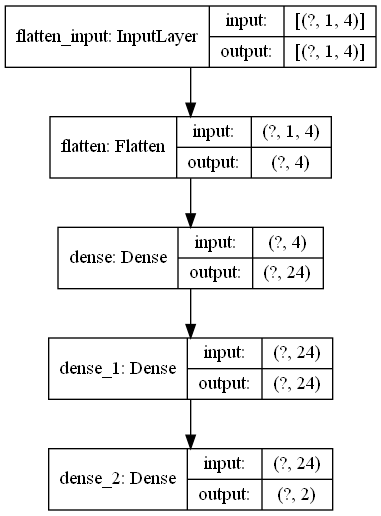

In [11]:
#from keras.utils.vis_utils import plot_model
tensorflow.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

visualize the model, with visualkeras

In [12]:
!pip install visualkeras

In [13]:
import visualkeras

In [14]:
visualkeras.layered_view(model, to_file="model.png")

## Step 05: Build agent with Keras-RL

In [15]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [16]:
def build_agent(model,actions):
    policy=BoltzmannQPolicy()
    memory=SequentialMemory(limit=50000,window_length=1)
    dqn=DQNAgent(model=model,
                 memory=memory,
                 policy=policy,
                 nb_actions=actions,
                 nb_steps_warmup=10,
                 target_model_update=1e-2
                )
    return dqn

the first line is used in the following box to avoid this error: AttributeError: 'Sequential' object has no attribute '_compile_time_distribution_strategy'

In [17]:
model=build_model(states,actions) # if we comment the first line we get the above error
dqn = build_agent(model,actions)
dqn.compile(tensorflow.keras.optimizers.Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env,nb_steps=50000,visualize=False,verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
    1/10000 [..............................] - ETA: 28:01 - reward: 1.0000

d:\installed_program\anaconda3\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 89s 9ms/step - reward: 1.0000
104 episodes - episode_reward: 95.192 [10.000, 200.000] - loss: 3.311 - mae: 19.183 - mean_q: 38.718

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 87s 9ms/step - reward: 1.0000
51 episodes - episode_reward: 196.627 [166.000, 200.000] - loss: 5.742 - mae: 37.028 - mean_q: 74.488

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 96s 10ms/step - reward: 1.0000
51 episodes - episode_reward: 197.255 [168.000, 200.000] - loss: 4.786 - mae: 38.700 - mean_q: 77.698

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 103s 10ms/step - reward: 1.0000
50 episodes - episode_reward: 199.880 [194.000, 200.000] - loss: 6.237 - mae: 38.725 - mean_q: 77.743

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 89s 9ms/step - reward: 1.0000
done, took 464.930 seconds


In [18]:
import numpy as np
scores=dqn.test(env, nb_episodes=100, visualize=False)
print('mean result: {}'.format(np.mean(scores.history['episode_reward'])))

Testing for 100 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200
Episode 21: reward: 200.000, steps: 200
Episode 22: reward: 200.000, steps: 200
Episode 23: reward: 200.000, steps: 200
Episode 24: reward: 200.000, steps: 200
Episode 25: reward: 

In [19]:
print('mean result: {}'.format(np.mean(scores.history['episode_reward'])))

mean result: 200.0


visualize for 10 examples

In [20]:
_ = dqn.test(env, nb_episodes = 10, visualize=True)

Testing for 10 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200


## Step 06: Reloading Agent from Memory

Running the following command we can save the weights of our model and reload later on

In [21]:
dqn.save_weights('dqn_weights.h5f',overwrite=True)

now we delete the already created model, dqn agent and environment, and recreate the whole scnerio again and use the above saved model in h5f format to obtain the result

In [22]:
del model
del dqn
del env

rebuilding functions and dqn agent agent

In [23]:
env=gym.make('CartPole-v0')
actions=env.action_space.n
states = env.observation_space.shape[0]
model=build_model(states,actions)
dqn=build_agent(model,actions)
dqn.compile(tensorflow.keras.optimizers.Adam(lr=1e-3), metrics=['mae'])

reload weights now

In [24]:
dqn.load_weights('dqn_weights.h5f')

In [25]:
_=dqn.test(env,nb_episodes=5,visualize=True)

Testing for 5 episodes ...


d:\installed_program\anaconda3\lib\site-packages\pyglet\window\__init__.py:667: UserWarning: 
Your graphics drivers do not support OpenGL 2.0.
You may experience rendering issues or crashes.
Microsoft Corporation
GDI Generic
1.1.0
  warnings.warn(message)


Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200


--------------END---------------